# Data

## data transform

In [2]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import tensorflow as tf

# import data
trainspeed=sio.loadmat('../data/transpeed')['transpeed'][0:4612].flatten()
trainclass=sio.loadmat('../data/trainclass')['trainclass'][0:4612].flatten()
testspeed=sio.loadmat('../data/testspeed')['cyc_mph1'][0:4479].flatten()
testclass=sio.loadmat('../data/testclass')['testcyc'][0:4479].flatten()

realspeed=np.reshape(sio.loadmat('../data/realspeed.mat')['a'],[-1])
# print(realspeed.shape)
# plt.figure()
# plt.plot(realspeed)


# hyperparameters
WIDTH=200
STEP=10
# BATCH=10


trainspeed_1=trainspeed[np.argwhere(trainclass==1).flatten()]
trainspeed_2=trainspeed[np.argwhere(trainclass==2).flatten()]
trainspeed_3=trainspeed[np.argwhere(trainclass==3).flatten()]
trainspeed_4=trainspeed[np.argwhere(trainclass==4).flatten()]
testspeed_1=trainspeed[np.argwhere(testclass==1).flatten()]
testspeed_2=trainspeed[np.argwhere(testclass==2).flatten()]
testspeed_3=trainspeed[np.argwhere(testclass==3).flatten()]
testspeed_4=trainspeed[np.argwhere(testclass==4).flatten()]

trainNum_1=int((trainspeed_1.size-WIDTH)/STEP)+1
trainNum_2=int((trainspeed_2.size-WIDTH)/STEP)+1
trainNum_3=int((trainspeed_3.size-WIDTH)/STEP)+1
trainNum_4=int((trainspeed_4.size-WIDTH)/STEP)+1
testNum_1=int((testspeed_1.size-WIDTH)/STEP)+1
testNum_2=int((testspeed_2.size-WIDTH)/STEP)+1
testNum_3=int((testspeed_3.size-WIDTH)/STEP)+1
testNum_4=int((testspeed_4.size-WIDTH)/STEP)+1
realNum=int((realspeed.size-WIDTH)/STEP)+1

trainset_1=np.zeros([trainNum_1,WIDTH,WIDTH])
trainset_2=np.zeros([trainNum_2,WIDTH,WIDTH])
trainset_3=np.zeros([trainNum_3,WIDTH,WIDTH])
trainset_4=np.zeros([trainNum_4,WIDTH,WIDTH])
testset_1=np.zeros([testNum_1,WIDTH,WIDTH])
testset_2=np.zeros([testNum_2,WIDTH,WIDTH])
testset_3=np.zeros([testNum_3,WIDTH,WIDTH])
testset_4=np.zeros([testNum_4,WIDTH,WIDTH])
realset=np.zeros([realNum,WIDTH,WIDTH])

for i in range(trainNum_1):
    trainset_1[i,(trainspeed_1[i*STEP:i*STEP+WIDTH].astype(int)),range(WIDTH)]=1
for i in range(trainNum_2):
    trainset_2[i,(trainspeed_2[i*STEP:i*STEP+WIDTH].astype(int)),range(WIDTH)]=1
for i in range(trainNum_3):
    trainset_3[i,(trainspeed_3[i*STEP:i*STEP+WIDTH].astype(int)),range(WIDTH)]=1
for i in range(trainNum_4):
    trainset_4[i,(trainspeed_4[i*STEP:i*STEP+WIDTH].astype(int)),range(WIDTH)]=1
for i in range(testNum_1):
    testset_1[i,(testspeed_1[i*STEP:i*STEP+WIDTH].astype(int)),range(WIDTH)]=1
for i in range(testNum_2):
    testset_2[i,(testspeed_2[i*STEP:i*STEP+WIDTH].astype(int)),range(WIDTH)]=1
for i in range(testNum_3):
    testset_3[i,(testspeed_3[i*STEP:i*STEP+WIDTH].astype(int)),range(WIDTH)]=1
for i in range(testNum_4):
    testset_4[i,(testspeed_4[i*STEP:i*STEP+WIDTH].astype(int)),range(WIDTH)]=1
for i in range(realNum):
    realset[i,(realspeed[i*STEP:i*STEP+WIDTH].astype(int)),range(WIDTH)]=1

trainset=np.concatenate((trainset_1,trainset_2,trainset_3,trainset_4),axis=0)
testset=np.concatenate((testset_1,testset_2,testset_3,testset_4),axis=0)
trainclass=np.concatenate((np.ones(trainset_1.shape[0]),2*np.ones(trainset_2.shape[0]),
                           3*np.ones(trainset_3.shape[0]),4*np.ones(trainset_4.shape[0])),axis=0)
testclass=np.concatenate((np.ones(testset_1.shape[0]),2*np.ones(testset_2.shape[0]),
                           3*np.ones(testset_3.shape[0]),4*np.ones(testset_4.shape[0])),axis=0)

In [3]:
# a=np.array([1,2,3,4])
# print(np.eye(4)[a-1])
# print(trainset_1.shape)
# print(trainset_2.shape)
# print(trainset_3.shape)
# print(trainset_4.shape)
# print(testset_1.shape)
# print(testset_2.shape)
# print(testset_3.shape)
# print(testset_4.shape)
# print(trainset.shape)
# print(testset.shape)
# print(trainclass.shape)
# print(testclass.shape)

# plt.figure(1)
# img = Image.fromarray(testset[0].astype('uint8')).convert('L')
# plt.imshow(img,cmap='gray',origin='lower')
# plt.figure(1_1)
# plt.plot(testspeed_1[:200])
# plt.xlim(0,200)
# plt.ylim(0,200)

# plt.figure(2)
# img = Image.fromarray(testset[1].astype('uint8')).convert('L')
# plt.imshow(img,cmap='gray',origin='lower')
# plt.figure(2_1)
# plt.plot(testspeed_1[10:210])
# plt.xlim(0,200)
# plt.ylim(0,200)

# plt.figure(1)
# as1=plt.subplot(3,1,1)
# plt.plot(trainspeed_1)
# plt.xlim(0,4612)
# ax2=plt.subplot(3,1,2)
# plt.plot(trainspeed_2)
# plt.xlim(0,4612)
# ax3=plt.subplot(3,1,3)
# plt.plot(trainspeed_3)
# plt.xlim(0,4612)

# plt.figure(2)
# plt.plot(trainspeed)

# plt.figure(3)
# as1=plt.subplot(3,1,1)
# plt.plot(testspeed_1)
# plt.xlim(0,4479)
# ax2=plt.subplot(3,1,2)
# plt.plot(testspeed_2)
# plt.xlim(0,4479)
# ax3=plt.subplot(3,1,3)
# plt.plot(testspeed_3)
# plt.xlim(0,4479)

# plt.figure(4)
# plt.plot(testspeed)

## data pooling

In [4]:
# hyperparameters
STRIDE=5  # stride越小曲线越平滑
FILTER=5  # filter越大曲线越粗

# initialization
trainNum=trainclass.size
testNum=testclass.size
WIDTH_=int((WIDTH-FILTER)/STRIDE)+1
trainset_=np.zeros([trainNum,WIDTH_,WIDTH_])
testset_=np.zeros([testNum,WIDTH_,WIDTH_])
realset_=np.zeros([realNum,WIDTH_,WIDTH_])

for k in range(trainNum):
    for i in range(WIDTH_):
        for j in range(WIDTH_):
            trainset_[k,i,j]=np.max(trainset[k,i*STRIDE:i*STRIDE+FILTER,j*STRIDE:j*STRIDE+FILTER])
            
for k in range(testNum):
    for i in range(WIDTH_):
        for j in range(WIDTH_):
            testset_[k,i,j]=np.max(testset[k,i*STRIDE:i*STRIDE+FILTER,j*STRIDE:j*STRIDE+FILTER])
            
for k in range(realNum):
    for i in range(WIDTH_):
        for j in range(WIDTH_):
            realset_[k,i,j]=np.max(realset[k,i*STRIDE:i*STRIDE+FILTER,j*STRIDE:j*STRIDE+FILTER])

# one-hot code
trainclass_=np.eye(4)[(trainclass).astype(int)-1]
testclass_=np.eye(4)[(testclass).astype(int)-1]

In [5]:
# # dataset shape
# print(WIDTH_)
# print(testNum)
# a=testclass==1
# b=testclass==2
# c=testclass==3
# d=testclass==4
# print(testclass[a].shape,testclass[b].shape,testclass[c].shape,testclass[d].shape)

# print(trainNum)
# a=trainclass==1
# b=trainclass==2
# c=trainclass==3
# d=trainclass==4
# print(trainclass[a].shape,trainclass[b].shape,trainclass[c].shape,trainclass[d].shape)

print(trainset_.shape,testset_.shape,realset_.shape)

(384, 40, 40) (371, 40, 40) (477, 40, 40)


In [48]:
# # sample visualization
# plt.figure(1)
# img = Image.fromarray(trainset_[0].astype('uint8')).convert('L')
# plt.imshow(img,cmap='gray',origin='lower')
# plt.figure(1_1)
# plt.plot(testspeed_1[:200])
# plt.xlim(0,200)
# plt.ylim(0,200)

# plt.figure(2)
# img = Image.fromarray(trainset_[1].astype('uint8')).convert('L')
# plt.imshow(img,cmap='gray',origin='lower')
# plt.figure(2_1)
# plt.plot(testspeed_1[10:210])
# plt.xlim(0,200)
# plt.ylim(0,200)

# plt.figure(3)
# img = Image.fromarray(testset_[0].astype('uint8')).convert('L')
# plt.imshow(img,cmap='gray',origin='lower')
# plt.figure(3_1)
# plt.plot(testspeed_1[:200])
# plt.xlim(0,200)
# plt.ylim(0,200)

# plt.figure(4)
# img = Image.fromarray(testset_[1].astype('uint8')).convert('L')
# plt.imshow(img,cmap='gray',origin='lower')
# plt.figure(4_1)
# plt.plot(testspeed_1[10:210])
# plt.xlim(0,200)
# plt.ylim(0,200)


# CNN+KPCA

## construct graph

In [50]:
import os

def ppp(lad,sig):
    
    keep_dimension=next(i for i,value in enumerate(lad) if value>=0.9)+1
    sig[:,keep_dimension:]=0
    return sig

# hyperparameters
# FILTER_WIDHER:5*5
# FILTER_NUM1:16
# FILTER_NUM2:32
# keep_info: 0.9

tf.reset_default_graph()
tf.set_random_seed(2)

x=tf.placeholder("float",shape=[None,WIDTH_,WIDTH_],name="x")
y_=tf.placeholder("float",shape=[None,4],name="y_")
BATCH=tf.placeholder("float",name="BATCH")

x_image=tf.reshape(x,[-1,WIDTH_,WIDTH_,1])
W_conv1=tf.Variable(tf.random_normal(shape=[5,5,1,16],mean=0,stddev=0.1))
b_conv1=tf.Variable(tf.constant(0.1,shape=[16]))
h_conv1=tf.nn.relu(tf.nn.conv2d(x_image,W_conv1,strides=[1,1,1,1],padding='SAME')+b_conv1)
h_pool1=tf.nn.max_pool(h_conv1,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')

W_conv2=tf.Variable(tf.random_normal(shape=[5,5,16,32],mean=0,stddev=0.1))
b_conv2=tf.Variable(tf.constant(0.1,shape=[32]))
h_conv2=tf.nn.relu(tf.nn.conv2d(h_pool1,W_conv2,strides=[1,1,1,1],padding='SAME')+b_conv2)
h_pool2=tf.nn.max_pool(h_conv2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
h_pool2_flat=tf.reshape(h_pool2,shape=([-1,int(WIDTH_*WIDTH_*32/4/4)]),name="h_pool2_flat")

W_fc1=tf.Variable(tf.random_normal(shape=[int(WIDTH_*WIDTH_*32/4/4),128],mean=0,stddev=0.1))
b_fc1=tf.Variable(tf.constant(0.1,shape=[128]))
h_fc1=tf.nn.relu(tf.matmul(h_pool2_flat,W_fc1)+b_fc1)

keep_prob=tf.placeholder("float",name="keep_prob")
h_fc1_drop=tf.nn.dropout(h_fc1,keep_prob)

W_fc2=tf.Variable(tf.random_normal(shape=[128,4],mean=0,stddev=0.1))
b_fc2=tf.Variable(tf.constant(0.1,shape=[4]))
y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop,W_fc2)+b_fc2)

cross_entropy=-tf.reduce_sum(y_*tf.log(y_conv))
# tf.summary.histogram("cross_entropy",cross_entropy)
train_step=tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction=tf.equal(tf.argmax(y_,1),tf.argmax(y_conv,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,"float"),name="accuracy")
y_predict=tf.arg_max(y_conv,dimension=1)

tf.summary.scalar("accuracy",accuracy)
writer = tf.summary.FileWriter("/Users/xieliang/tensorboard/log/")
summaries = tf.summary.merge_all()
saver=tf.train.Saver(max_to_keep=1)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    np.random.seed(1)
    for i in range(5000):
        index=np.random.choice(trainNum,20,replace=False)
        sample=trainset_[index]
        label=trainclass_[index]
        if i%100==0:
            train_accuracy=accuracy.eval(feed_dict={x:sample,y_:label,keep_prob:1.0,BATCH:20})
            print("step %d, validation accuracy %g"%(i, train_accuracy))
        summ,_=sess.run([summaries,train_step],feed_dict={x:sample,y_:label,keep_prob:0.5,BATCH:20})
        writer.add_summary(summ,i)
        
    y_pre=y_predict.eval(feed_dict={x:realset_,keep_prob:1.0,BATCH:realNum})
    print("train accuracy %g"%accuracy.eval(feed_dict={
        x: trainset_, y_: trainclass_, keep_prob: 1.0,BATCH:trainNum}))
    print("test accuracy %g"%accuracy.eval(feed_dict={
        x: testset_, y_: testclass_, keep_prob: 1.0,BATCH:testNum}))
    
#     # save model
#     saver.save(sess,'./model/cnn-model',write_meta_graph=True)
#     print('model saved into'+' '+str(os.getcwd())+'/model/cnn-model')
    
    
# numpy 产生one-hot用np.eye()
# 随机数种子执行一次生成一个或一系列特定(与参数相关)的随机数
# 根据索引批量获取数组元素：indexes=y==0, X[indexes]

step 0, validation accuracy 0.05
step 100, validation accuracy 0.7
step 200, validation accuracy 1
step 300, validation accuracy 1
step 400, validation accuracy 0.95
step 500, validation accuracy 1
step 600, validation accuracy 1
step 700, validation accuracy 1
step 800, validation accuracy 1
step 900, validation accuracy 1
step 1000, validation accuracy 1
step 1100, validation accuracy 1
step 1200, validation accuracy 1
step 1300, validation accuracy 1
step 1400, validation accuracy 1
step 1500, validation accuracy 1
step 1600, validation accuracy 1
step 1700, validation accuracy 1
step 1800, validation accuracy 1
step 1900, validation accuracy 1
step 2000, validation accuracy 1
step 2100, validation accuracy 1
step 2200, validation accuracy 1
step 2300, validation accuracy 1
step 2400, validation accuracy 1
step 2500, validation accuracy 1
step 2600, validation accuracy 1
step 2700, validation accuracy 1
step 2800, validation accuracy 1
step 2900, validation accuracy 1
step 3000, val

In [1]:
# real speed test
a=y_pre==1
ave=y_pre[a].size/y_pre.size
# print(y_pre.size) 477
print(ave)
print(457/y_pre.size)
plt.figure()
print(y_pre)
plt.plot(y_pre)

NameError: name 'y_pre' is not defined

## reconstruct

In [6]:
import tensorflow as tf
import numpy as np
from hyperopt import fmin, hp, Trials, tpe


tf.reset_default_graph()
graph=tf.get_default_graph()
sess=tf.Session()
# restore the former part of the model
new_saver=tf.train.import_meta_graph("./model/cnn-model.meta")
new_saver.restore(sess,tf.train.latest_checkpoint("./model/"))

BATCH=graph.get_tensor_by_name("BATCH:0")
keep_prob=graph.get_tensor_by_name("keep_prob:0")
x=graph.get_tensor_by_name("x:0")
y_=graph.get_tensor_by_name("y_:0")
flat=graph.get_tensor_by_name("h_pool2_flat:0")
flat_input=tf.placeholder(dtype="float")


# obtain the principle components of the trainset_ and perform projection
# using rbf kernel
flat_tile=tf.tile(tf.expand_dims(flat,axis=0),multiples=[trainNum,1,1])
norm_=tf.norm(flat_tile-tf.transpose(flat_tile,perm=[1,0,2]),axis=2)
K_rbf=tf.exp(tf.cast(-1/tf.shape(flat)[1],dtype=tf.float32)*tf.square(norm_))
N=1/trainNum*tf.ones(shape=[trainNum,trainNum])
K_rbf_=K_rbf-tf.matmul(N,K_rbf)-tf.matmul(K_rbf,N)+tf.matmul(tf.matmul(N,K_rbf),N)
val,vec=tf.self_adjoint_eig(K_rbf_)
val=tf.reverse(val,axis=[0])
vec=tf.reverse(vec,axis=[1])
vec_=tf.multiply(1/tf.sqrt(val),vec)
flat_train=tf.slice(tf.matmul(K_rbf_,vec_),[0,0],[-1,30])


# calculate the kernel matrix between trainset_ and testset_ and perform projection
train_flat=tf.placeholder("float")
test_flat=tf.placeholder("float")
test_flat_=tf.tile(tf.expand_dims(test_flat,axis=0),multiples=[trainNum,1,1])
train_flat_=tf.tile(tf.expand_dims(train_flat,axis=0),multiples=[testNum,1,1])
normal=tf.norm(train_flat_-tf.transpose(test_flat_,perm=[1,0,2]),axis=2)
K_ab=tf.exp(tf.cast(-1/tf.shape(flat)[1],dtype=tf.float32)*tf.square(normal))
train_1=1/trainNum*tf.ones(shape=[trainNum,trainNum])
test_1=1/trainNum*tf.ones(shape=[testNum,trainNum])
K_ab_=K_ab-tf.matmul(test_1,K_rbf)-tf.matmul(K_ab,train_1)+tf.matmul(tf.matmul(test_1,K_rbf),train_1)
flat_test=tf.slice(tf.matmul(K_ab_,vec_),[0,0],[-1,30])

input_train=sess.run(flat_train,feed_dict={x:trainset_})
Train_flat=sess.run(flat,feed_dict={x:trainset_})
Test_flat=sess.run(flat,feed_dict={x:testset_})
input_test=sess.run(flat_test,feed_dict={x:trainset_,train_flat:Train_flat,test_flat:Test_flat})

INFO:tensorflow:Restoring parameters from ./model/cnn-model


## AutoML

In [127]:
counter=0

class HyperParams(object):
    def __init__(self,lr=0.0018867,n_hidden=14,epoch=3000,keep_prob_=0.63218,n_component=12):
        self.lr=lr
        self.n_hidden=int(n_hidden)
        self.epoch=int(epoch)
        self.keep_prob_=keep_prob_
        self.n_component=int(n_component)
        
    def to_string(self):
        return 'lr: {}, n_hidden: {}, epoch: {}, keep_prob: {}, n_component: {}'.format(
            self.lr,self.n_hidden,self.epoch,self.keep_prob_,self.n_component)
    

def model(hyperparams):
    
    with tf.name_scope("fully"):
        _w_fc1=tf.Variable(tf.random_normal(shape=[hyperparams.n_component,hyperparams.n_hidden],mean=0,stddev=0.1))
        _b_fc1=tf.Variable(tf.constant(0.1,shape=[hyperparams.n_hidden]))
        _h_fc1=tf.nn.relu(tf.matmul(flat_input,_w_fc1)+_b_fc1)
        _h_fc1_drop=tf.nn.dropout(_h_fc1,keep_prob)
        _w_fc2=tf.Variable(tf.random_normal(shape=[hyperparams.n_hidden,4],mean=0,stddev=0.1))
        _b_fc2=tf.Variable(tf.constant(0.1,shape=[4]))
        _y_conv=tf.nn.softmax(tf.matmul(_h_fc1_drop,_w_fc2)+_b_fc2)

    _cross_entropy=-tf.reduce_sum(y_*tf.log(_y_conv))
    _cost=tf.reduce_mean(_cross_entropy)
    _output_var=tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES,scope='fully')
    _train_step=tf.train.AdamOptimizer(hyperparams.lr).minimize(_cost,var_list= _output_var)
    _correct_pre=tf.equal(tf.arg_max(y_,dimension=1),tf.arg_max(_y_conv,dimension=1))
    _accuracy=tf.reduce_mean(tf.cast(_correct_pre,"float"))
    
    wrong_index=tf.where(tf.equal(tf.cast(_correct_pre,tf.int32),0))
    wrong_class_type=tf.gather_nd(tf.arg_max(_y_conv,dimension=1),wrong_index)
    
    return _train_step,_accuracy,wrong_index,wrong_class_type


def train(hyperparams):
    
    tf.set_random_seed(11)
    _train_step,_accuracy,wrong_index,wrong_class_type=model(hyperparams)
    input_train_=input_train[:,:hyperparams.n_component]
    input_test_=input_test[:,:hyperparams.n_component]
    

    with sess.as_default():

        sess.run(tf.global_variables_initializer())

        for i in range(hyperparams.epoch):
            
            sess.run(_train_step,feed_dict={flat_input:input_train_,y_:trainclass_,keep_prob:hyperparams.keep_prob_,BATCH:trainNum})

        train_acc=_accuracy.eval(feed_dict={flat_input:input_train_,y_:trainclass_,keep_prob:1.0,BATCH:testNum})
        test_acc=_accuracy.eval(feed_dict={flat_input:input_test_,y_:testclass_,keep_prob:1.0,BATCH:testNum})
        # wrong predicted sample index in testset
        wrong_id,wrong_ct=sess.run([wrong_index,wrong_class_type],feed_dict={flat_input:input_test_,y_:testclass_,keep_prob:1.0,BATCH:testNum})
        
    return train_acc,test_acc,wrong_id,wrong_ct


def optimizer(arg):
    
    global counter
    
    counter+=1
    hyper=HyperParams(**arg)
    print('epoch {}=====>'.format(counter)+hyper.to_string())
    train_acc,test_acc,wrong_id,wrong_ct=train(hyper)
    return {
        'status': 'ok',
        'loss': -test_acc,
        'metrics': {
            'test_acc': test_acc,
            'train_acc': train_acc,
            'wrong_id': wrong_id,
            'wrong_class_type':wrong_ct
        }
    }
        

def main():
    
    space={
        'lr': hp.loguniform('lr', np.log(0.0001), np.log(0.01)),
        'n_hidden': hp.quniform('n_hidden', 8, 100, 1),
        'epoch':hp.quniform('epoch',1000,7000,1000),
        'keep_prob_':hp.uniform('keep_prob', 0.2, 1.0),
        'n_component':hp.quniform('n_component',2,20,1)    
    }
    
    t=Trials()
    best=fmin(optimizer,space,algo=tpe.suggest,max_evals=100,trials=t)
    print('TPE best: {} --> {}'.format(best,t.best_trial['result']))
    
    for trial in t.trials:
        print('{} --> {}'.format(trial['misc']['vals'],-trial['result']['loss']))
        

    
#tf.summary.FileWriter("/Users/xieliang/tensorboard/cnn", sess.graph)

    
if __name__=='__main__':
    main()

epoch 1=====>lr: 0.0005270549573773794, n_hidden: 31, epoch: 2000, keep_prob: 0.7259362153153253, n_component: 6
epoch 2=====>lr: 0.00012938714195438744, n_hidden: 55, epoch: 7000, keep_prob: 0.8784681114869628, n_component: 9
epoch 3=====>lr: 0.003340117831671315, n_hidden: 84, epoch: 3000, keep_prob: 0.9978609733510091, n_component: 5
epoch 4=====>lr: 0.0016888471672585489, n_hidden: 16, epoch: 3000, keep_prob: 0.6615135435834776, n_component: 4
epoch 5=====>lr: 0.002820143307911687, n_hidden: 37, epoch: 5000, keep_prob: 0.42948490258096217, n_component: 9
epoch 6=====>lr: 0.003938064738335, n_hidden: 33, epoch: 6000, keep_prob: 0.779269352917747, n_component: 9
epoch 7=====>lr: 0.0001097692464294854, n_hidden: 75, epoch: 2000, keep_prob: 0.8046446948721846, n_component: 20
epoch 8=====>lr: 0.00010723304462388233, n_hidden: 28, epoch: 1000, keep_prob: 0.5338795667433529, n_component: 17
epoch 9=====>lr: 0.005151991366984606, n_hidden: 85, epoch: 4000, keep_prob: 0.40324934698442827, 

epoch 73=====>lr: 0.003293684332230182, n_hidden: 21, epoch: 2000, keep_prob: 0.5691310037032085, n_component: 13
epoch 74=====>lr: 0.0027746935609603046, n_hidden: 40, epoch: 3000, keep_prob: 0.6712278021800581, n_component: 12
epoch 75=====>lr: 0.006165691565245634, n_hidden: 37, epoch: 1000, keep_prob: 0.47872702916173143, n_component: 7
epoch 76=====>lr: 0.002011586910701652, n_hidden: 12, epoch: 2000, keep_prob: 0.52867560420366, n_component: 15
epoch 77=====>lr: 0.0004452222588474237, n_hidden: 11, epoch: 3000, keep_prob: 0.5382587579174059, n_component: 18
epoch 78=====>lr: 0.0016710721730081376, n_hidden: 17, epoch: 1000, keep_prob: 0.38689589272491753, n_component: 17
epoch 79=====>lr: 0.0005635097686589887, n_hidden: 23, epoch: 2000, keep_prob: 0.2346009209055554, n_component: 15
epoch 80=====>lr: 0.0009126937106215437, n_hidden: 43, epoch: 7000, keep_prob: 0.44752380942907405, n_component: 14
epoch 81=====>lr: 0.0020038365966064064, n_hidden: 46, epoch: 1000, keep_prob: 0.33

## plot

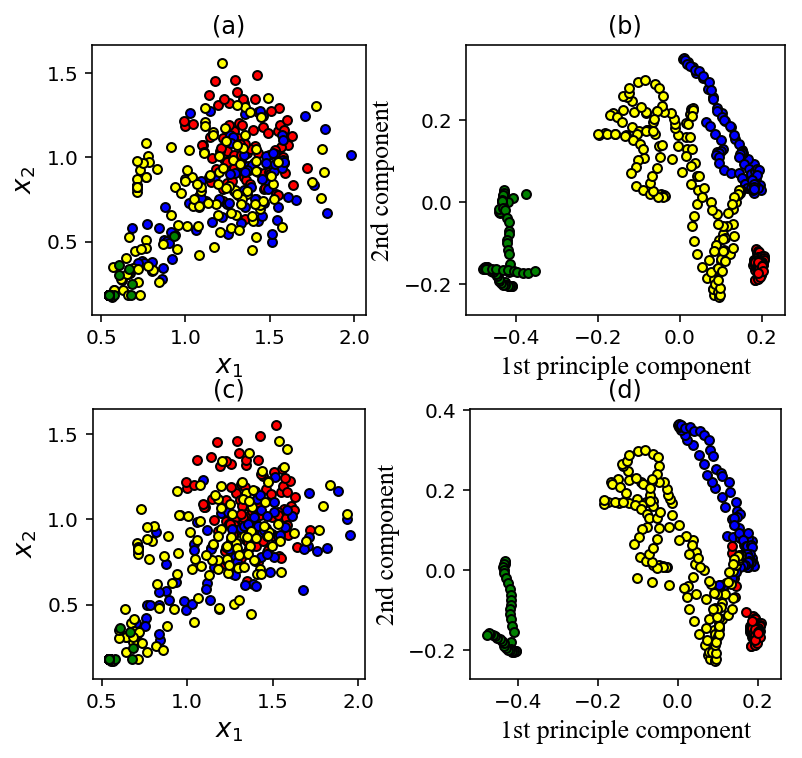

In [11]:
# compare results

import matplotlib.pyplot as plt
# %matplotlib notebook
%matplotlib inline
# 显示高清图
%config InlineBackend.figure_format ='retina'


plt.figure()

reds=trainclass==1
blues=trainclass==2
yellow=trainclass==3
green=trainclass==4

font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 13,}

plt.subplot(2,2,1,aspect='equal')
# plt.title("Original training space")
plt.title("(a)")
plt.scatter(Train_flat[reds,0],Train_flat[reds,1], c="red",s=20, edgecolor='k')
plt.scatter(Train_flat[blues,0],Train_flat[blues,1], c="blue",s=20, edgecolor='k')
plt.scatter(Train_flat[yellow,0],Train_flat[yellow,1], c="yellow",s=20, edgecolor='k')
plt.scatter(Train_flat[green,0],Train_flat[green,1], c="green",s=20, edgecolor='k')
plt.xlabel("$x_1$",font1)
plt.ylabel("$x_2$",font1)

plt.subplot(2,2,2,aspect='equal')
# plt.title("Training KPCA projection")
plt.title("(b)")
plt.scatter(input_train[reds,0],input_train[reds,1], c="red",s=20, edgecolor='k')
plt.scatter(input_train[blues,0],input_train[blues,1], c="blue",s=20, edgecolor='k')
plt.scatter(input_train[yellow,0],input_train[yellow,1], c="yellow",s=20, edgecolor='k')
plt.scatter(input_train[green,0],input_train[green,1], c="green",s=20, edgecolor='k')
plt.xlabel("1st principle component",font1)
plt.ylabel("2nd component",font1)

reds=testclass==1
blues=testclass==2
yellow=testclass==3
green=testclass==4

plt.subplot(2,2,3,aspect='equal')
# plt.title("Original testing space")
plt.title("(c)")
plt.scatter(Test_flat[reds,0],Test_flat[reds,1], c="red",s=20, edgecolor='k')
plt.scatter(Test_flat[blues,0],Test_flat[blues,1], c="blue",s=20, edgecolor='k')
plt.scatter(Test_flat[yellow,0],Test_flat[yellow,1], c="yellow",s=20, edgecolor='k')
plt.scatter(Test_flat[green,0],Test_flat[green,1], c="green",s=20, edgecolor='k')
plt.xlabel("$x_1$",font1)
plt.ylabel("$x_2$",font1)

plt.subplot(2,2,4,aspect='equal')
# plt.title("Testing KPCA projection")
plt.title("(d)")
plt.scatter(input_test[reds,0],input_test[reds,1], c="red",s=20, edgecolor='k')
plt.scatter(input_test[blues,0],input_test[blues,1], c="blue",s=20, edgecolor='k')
plt.scatter(input_test[yellow,0],input_test[yellow,1], c="yellow",s=20, edgecolor='k')
plt.scatter(input_test[green,0],input_test[green,1], c="green",s=20, edgecolor='k')
plt.xlabel("1st principle component",font1)
plt.ylabel("2nd component",font1)

# plt.subplots_adjust(left=0.2, bottom=0.2, right=0.85, top=1, hspace=0.6, wspace=0.1)
# plt.subplots_adjust(0.02, 0.10, 0.98, 0.94, 0.04, 0.35)
plt.subplots_adjust(0.2, 0.1, 1.1, 1.2, 0.04, 0.35)

plt.show()


# print(input[:120,:])

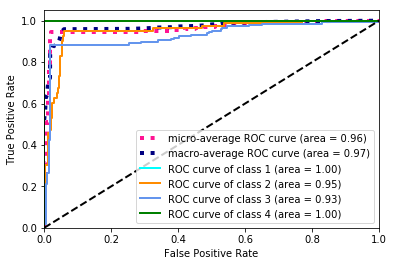

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc,roc_auc_score
from scipy import interp

np.random.seed(4)
n_classes=4
# y_test=np.array([[1,0,0],[0,1,0],[0,0,1],[1,0,0],[0,1,0]])
# y_score=np.array([[0.5,0.2,0.1],[0.1,0.3,0.1],[0.2,0.1,0.8],[0.1,0.2,0.3],[0.2,0.5,0.1]])

# # CNN+KPCA
# y=np.concatenate([np.zeros(101,'int'),np.ones(83,"int"),2*np.ones(147,"int"),3*np.ones(40,"int")])
# y_test=np.eye(4)[y]
# y_score=np.random.random(size=y_test.shape)-0.5+y_test
# y_score[180:183,[1,2]]=y_score[180:183,[2,1]]
# y_score[324:331,[2,1]]=y_score[324:331,[1,2]]

# # # CNN+PCA
# 350/371
# y=np.concatenate([np.zeros(101,'int'),np.ones(83,"int"),2*np.ones(147,"int"),3*np.ones(40,"int")])
# y_test=np.eye(4)[y]
# y_score=np.random.random(size=y_test.shape)-0.5+y_test
# y_score[180:190,[1,2]]=y_score[180:190,[2,1]]
# y_score[320:331,[2,1]]=y_score[320:331,[1,2]]


# # MNN
# y=np.concatenate([np.zeros(101,'int'),np.ones(83,"int"),2*np.ones(147,"int"),3*np.ones(40,"int")])
# y_test=np.eye(4)[y]
# y_score=np.random.random(size=y_test.shape)-0.5+y_test
# y_score[90:95,[0,1]]=y_score[90:95,[1,0]]
# y_score[96:101,[0,2]]=y_score[96:101,[2,0]]
# y_score[158:162,[1,0]]=y_score[158:162,[0,1]]
# y_score[163:183,[1,2]]=y_score[163:183,[2,1]]
# y_score[308:331,[2,1]]=y_score[308:331,[1,2]]

# # KNN
# y=np.concatenate([np.zeros(101,'int'),np.ones(83,"int"),2*np.ones(147,"int"),3*np.ones(40,"int")])
# y_test=np.eye(4)[y]
# y_score=np.random.random(size=y_test.shape)-0.5+y_test
# y_score[81:85,[0,1]]=y_score[81:85,[1,0]]
# y_score[91:101,[0,2]]=y_score[91:101,[2,0]]
# y_score[150:155,[1,0]]=y_score[150:155,[0,1]]
# y_score[163:183,[1,2]]=y_score[163:183,[2,1]]
# y_score[297:302,[2,3]]=y_score[297:302,[3,2]]
# y_score[303:307,[2,0]]=y_score[303:307,[0,2]]
# y_score[308:331,[2,1]]=y_score[308:331,[1,2]]

# # CNN
# # 296/371
# y=np.concatenate([np.zeros(101,'int'),np.ones(83,"int"),2*np.ones(147,"int"),3*np.ones(40,"int")])
# y_test=np.eye(4)[y]
# y_score=np.random.random(size=y_test.shape)-0.5+y_test
# y_score[61:71,[0,1]]=y_score[61:71,[1,0]]
# y_score[81:91,[0,2]]=y_score[81:91,[2,0]]
# y_score[150:152,[1,0]]=y_score[150:152,[0,1]]
# y_score[163:183,[1,2]]=y_score[163:183,[2,1]]
# y_score[297:302,[2,3]]=y_score[297:302,[3,2]]
# y_score[308:331,[2,1]]=y_score[308:331,[1,2]]
# y_score[360:365,[3,2]]=y_score[360:365,[2,3]]

# # KPCANN
# y=np.concatenate([np.zeros(101,'int'),np.ones(83,"int"),2*np.ones(147,"int"),3*np.ones(40,"int")])
# y_test=np.eye(4)[y]
# y_score=np.random.random(size=y_test.shape)-0.5+y_test
# y_score[167:183,[1,2]]=y_score[167:183,[2,1]]
# y_score[316:331,[1,2]]=y_score[316:331,[2,1]]


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
thresholds=dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i]= roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# print(y_test[:,0])
# print(y_score[:,0])
# print(fpr[0])
# print(tpr[0])
# print(thresholds[0])
# print(roc_auc[0])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue',"g"])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


# test

In [118]:
a=1
a+=1
s='hello'
print('epoch {}========>'.format(a)+s)

epoch 2========>hello


In [124]:
tf.reset_default_graph()
sess=tf.Session()
a=tf.constant([[1,2,3],[4,5,6]])
a_exp=tf.expand_dims(a,axis=0)
a_tile=tf.tile(a_exp,multiples=[2,1,1])
print(sess.run(a_tile))
print(sess.run(a_tile).shape)
print(sess.run(tf.shape(a)[0]))

[[[1 2 3]
  [4 5 6]]

 [[1 2 3]
  [4 5 6]]]
(2, 2, 3)
2


In [ ]:
# tf.silce()
tf.reset_default_graph()
sess=tf.Session()
a=tf.constant([[1,2,3,4],[4,5,6,7],[7,8,9,10]])
b=tf.slice(a,[0,0],[-1,2])
print(sess.run(b))


In [128]:
# tensorflow kpca
import tensorflow as tf
tf.reset_default_graph()
sess=tf.Session()

def pp(lad,vec):
    
    keep_dimension=next(i for i,value in enumerate(lad) if value>=0.9999)+1
#     print(keep_dimension)
    vec[:,keep_dimension:]=0
#     print(vec)
    return vec

X=tf.constant([[0, -1.0], [-2, -1], [-3, -2], [11, -15], [20, 10], [3, 2]])
# linear kernel
# K=tf.matmul(X,tf.transpose(X))
# poly kernel
# K=tf.pow(1/2*tf.matmul(X,tf.transpose(X))+1,3)
# rbf kernel
X_=tf.tile(tf.expand_dims(X,axis=0),multiples=[tf.shape(X)[0],1,1])
norm_=tf.norm(X_-tf.transpose(X_,perm=[1,0,2]),axis=2)
K=tf.exp(-1/2*tf.square(norm_))

N=1/6*tf.ones(shape=[6,6])
K_=K-tf.matmul(N,K)-tf.matmul(K,N)+tf.matmul(tf.matmul(N,K),N)
val,vec=tf.self_adjoint_eig(K_)
val=tf.reverse(val,axis=[0])
vec=tf.reverse(vec,axis=[1])
# K_vec=tf.matmul(K_,vec)
# valvec=tf.matmul(vec,tf.diag(val))
# print(sess.run(val))
# print(sess.run(vec))
vec_=tf.multiply(1/tf.sqrt(val),vec)
ladder=tf.cumsum(val/tf.reduce_sum(val))
vec_k=tf.py_func(pp,[ladder,vec_],tf.float32)
new=tf.matmul(K_,vec_k) 
print(sess.run(new))



# transformer Y in the X-fitted model
Y = tf.constant([[-3, -2.0],[11,-15],[20,10]])
# # 两种求rbf核矩阵的方法
A=tf.tile(tf.expand_dims(Y,axis=0),multiples=[6,1,1])
B=tf.tile(tf.expand_dims(X,axis=0),multiples=[3,1,1])
norm_=tf.norm(tf.transpose(A,perm=[1,0,2])-B,axis=2)
K_ab=tf.exp(-1/2*tf.square(norm_))
# A=tf.tile(tf.reduce_sum(tf.square(Y),axis=1,keep_dims=True),multiples=[1,6])
# B=tf.tile(tf.reduce_sum(tf.square(X),axis=1,keep_dims=True),multiples=[1,3])
# K_ab=tf.exp(-1/2*(A+tf.transpose(B)-2*tf.matmul(Y,tf.transpose(X))))
N=1/6*tf.ones(shape=[6,6])
M=1/6*tf.ones(shape=[3,6])
K_ab_=K_ab-tf.matmul(M,K)-tf.matmul(K_ab,N)+tf.matmul(tf.matmul(M,K),N)
new_=tf.matmul(K_ab_,vec_k)
print(sess.run(new_))




# print(sess.run(ladder))


# a=tf.constant([[1.0,3],[4,6],[2,3]])
# b=tf.expand_dims(a,axis=0)
# c=tf.tile(b,multiples=[3,1,1])
# d=tf.transpose(c,perm=[1,0,2])
# f=tf.exp(-1/2*tf.square(tf.norm(c-d,axis=2)))
# print(sess.run(c))
# print(sess.run(d))
# print(sess.run(f))

# print(sess.run(tf.exp(tf.constant(1.))))


# print(sess.run(vec[:,5]))
# print(sess.run(tf.matmul(K_,tf.reshape(vec[:,5],shape=[6,1]))))
# print(sess.run(val[5]*vec[:,5]))

[[ 1.1221122e-02  2.0117417e-02  1.4901161e-08  8.8795924e-01
  -1.5896530e-01  0.0000000e+00]
 [-6.0614723e-01 -3.6586821e-04  8.9406967e-08 -1.4580965e-02
   5.7123148e-01  0.0000000e+00]
 [-6.0859859e-01 -7.3981583e-03  1.1920929e-07 -3.2836613e-01
  -5.0845575e-01  0.0000000e+00]
 [ 4.0117255e-01 -4.1225836e-01 -7.0710921e-01 -1.7246553e-01
   3.2046258e-02  0.0000000e+00]
 [ 4.0117267e-01 -4.1226640e-01  7.0710444e-01 -1.7246532e-01
   3.2046277e-02  0.0000000e+00]
 [ 4.0117952e-01  8.1217134e-01  4.5264096e-06 -2.0008127e-01
   3.2097034e-02  0.0000000e+00]]
[[-6.0859859e-01 -7.3981583e-03  1.3413205e-07 -3.2836610e-01
  -5.0845569e-01  0.0000000e+00]
 [ 4.0117249e-01 -4.1225833e-01 -7.0710927e-01 -1.7246553e-01
   3.2046273e-02  0.0000000e+00]
 [ 4.0117267e-01 -4.1226640e-01  7.0710444e-01 -1.7246532e-01
   3.2046277e-02  0.0000000e+00]]


In [62]:
# sklearn kpca
import numpy as np
from sklearn.decomposition import KernelPCA
# from sklearn.datasets import load_digits
# X, _ = load_digits(return_X_y=True)
X = np.array([[0, -1.0], [-2, -1], [-3, -2], [11, -15], [20, 10], [3, 2]])
Y = np.array([[0, -10.0], [-20, -1], [-30, -2], [11, -150], [20, 100]])
transformer = KernelPCA(n_components=6,kernel='rbf')
X_transformed = transformer.fit_transform(X)
# print(X_transformed)
# lambdas=transformer.lambdas_
alphas=transformer.alphas_
y_tran=transformer.transform(Y)
print(y_tran)

# print(alphas.shape)
# print(y_tran.shape)
# print(Y.shape)


# print(alphas)
# print(lambdas)
# print(sum(lambdas[0:1])/sum(lambdas))


[[-7.25463731e-02 -8.35383005e-07 -4.90140189e-17  6.87540185e-04
  -2.02155549e-02 -1.01994076e-09]
 [-7.25463731e-02 -8.35383005e-07 -5.02045448e-17  6.87540185e-04
  -2.02155549e-02 -9.53272526e-10]
 [-7.25463731e-02 -8.35383005e-07 -5.02045448e-17  6.87540185e-04
  -2.02155549e-02 -9.53272526e-10]
 [-7.25463731e-02 -8.35383005e-07 -5.02045448e-17  6.87540185e-04
  -2.02155549e-02 -9.53272526e-10]
 [-7.25463731e-02 -8.35383005e-07 -5.02045448e-17  6.87540185e-04
  -2.02155549e-02 -9.53272526e-10]]


In [3]:
# numpy kpca
X = np.array([[0, -1], [-2, -1], [-3, -2], [1, -1], [2, 1], [3, 2]])
# linear kernel
K=np.matmul(X,np.transpose(X))
N=1/6*np.ones(shape=[6,6])
K_=K-np.matmul(N,K)-np.matmul(K,N)+np.matmul(np.matmul(N,K),N)
val,vec=np.linalg.eig(K_)
# print(np.matmul(K_,vec[:,0]))
# print(val[0]*vec[:,0])
# print(val.shape)
vec_=np.multiply(vec,1/np.sqrt(val))
# print("lambda*x",np.matmul(vec_,np.diag(val)))
# print("Ax",np.matmul(K_,vec_))
new=np.matmul(K_,vec_)
print(vec_)

[[-1.35457196e-02       +0.j         -7.85302173e+07       +0.j
  -2.52557586e-01       +0.j          0.00000000e+00+10174644.37262033j
  -3.03348297e+06 +3635269.71626437j -3.03348297e+06 -3635269.71626437j]
 [-6.05229076e-02       +0.j         -1.02241557e+07       +0.j
   2.98112774e-01       +0.j          0.00000000e+00+12934003.33879836j
   4.88567334e+06 -9609302.14211058j  4.88567334e+06 +9609302.14211058j]
 [-9.84579326e-02       +0.j         -1.08767614e+06       +0.j
   1.25777780e-01       +0.j          0.00000000e+00  -228025.94461049j
  -1.63923617e+07 +9410981.9875952j  -1.63923617e+07 -9410981.9875952j ]
 [ 9.94287437e-03       +0.j          2.24061285e+07       +0.j
  -5.27892766e-01       +0.j          0.00000000e+00 +9164817.97187691j
  -4.49017667e+06 -2634498.06972979j -4.49017667e+06 +2634498.06972979j]
 [ 6.23243303e-02       +0.j         -6.74359207e+06       +0.j
   9.21124022e-02       +0.j          0.00000000e+00-20088321.46111712j
  -1.29581946e+07 -1375000.2

In [5]:
import numpy as np
a=np.array([[1,2,3],[4,6,8],[1,2,3]])
b=np.array([2,3,4])
print(np.multiply(a,b))
c=np.array([1,4,9])
d=1/np.sqrt(c)
print(np.multiply(d,a))
print(np.multiply(a,d))

[[ 2  6 12]
 [ 8 18 32]
 [ 2  6 12]]
[[1.         1.         1.        ]
 [4.         3.         2.66666667]
 [1.         1.         1.        ]]
[[1.         1.         1.        ]
 [4.         3.         2.66666667]
 [1.         1.         1.        ]]


In [54]:
import numpy as np
from sklearn.decomposition import PCA
# X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
X = np.array([[0, -1], [-2, -1], [-3, -2], [1, -1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
pca.fit(X)

# print(pca.explained_variance_ratio_)  

print(np.square(pca.singular_values_))

print(pca.transform(X))

[36.26395064  1.90271602]
[[-0.49122131  0.48054537]
 [-2.19479974 -0.56722395]
 [-3.57047361 -0.2393194 ]
 [ 0.36056791  1.00443002]
 [ 2.26012644 -0.17526374]
 [ 3.63580031 -0.5031683 ]]


In [62]:
# Y=np.array([[-1,-1],[-2,-1],[-3,-2],[1,1],[2,1],[3,2]])
Y=np.array([[0,-1],[-2,-1],[-3,-2],[1,-1],[2,1],[3,2]])
Y=Y-np.mean(Y,axis=0)
con=np.matmul(np.transpose(Y),Y)
val,vec=np.linalg.eig(con)
new=np.matmul(Y,vec)
print("con:",con)
print("val:",val)
print("vec:",vec)
print("new:",new)

con: [[26.83333333 15.33333333]
 [15.33333333 11.33333333]]
val: [36.26395064  1.90271602]
vec: [[ 0.85178921 -0.52388466]
 [ 0.52388466  0.85178921]]
new: [[-0.49122131 -0.48054537]
 [-2.19479974  0.56722395]
 [-3.57047361  0.2393194 ]
 [ 0.36056791 -1.00443002]
 [ 2.26012644  0.17526374]
 [ 3.63580031  0.5031683 ]]


In [70]:
a=tf.constant([[0.0,-1],[-2,-1],[-3,-2],[1,-1],[2,1],[3,2]])
a=a-tf.reduce_mean(a,axis=0)
conv=tf.matmul(tf.transpose(a),a)
val,vec=tf.self_adjoint_eig(conv)

val_=tf.reverse(val,axis=[0])
vec_=tf.reverse(vec,axis=[0])

new=tf.matmul(a,tf.transpose(vec_))

sess=tf.Session()
print(sess.run([val,vec]))
print(sess.run([val_,vec_]))
print(sess.run(new))


[array([ 1.9027169, 36.26395  ], dtype=float32), array([[-0.5238846 ,  0.85178924],
       [ 0.85178924,  0.5238846 ]], dtype=float32)]
[array([36.26395  ,  1.9027169], dtype=float32), array([[ 0.85178924,  0.5238846 ],
       [-0.5238846 ,  0.85178924]], dtype=float32)]
[[-0.49122125 -0.48054537]
 [-2.1947997   0.56722385]
 [-3.5704737   0.23931932]
 [ 0.36056796 -1.0044299 ]
 [ 2.2601266   0.17526394]
 [ 3.6358001   0.5031686 ]]


In [49]:
a=np.array([[1,2,3],[4,5,6]])
b=np.array([[1,1],[1,1],[1,1]])
print(np.matmul(a,b))

[[ 6  6]
 [15 15]]


In [53]:
c=np.array([[2,3],[2,1]])
print(np.linalg.eig(c))

(array([ 4., -1.]), array([[ 0.83205029, -0.70710678],
       [ 0.5547002 ,  0.70710678]]))


(0, 200)

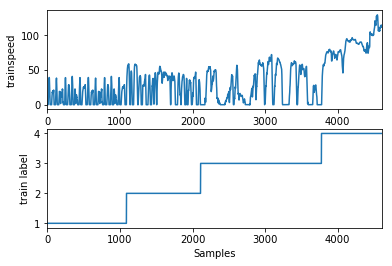

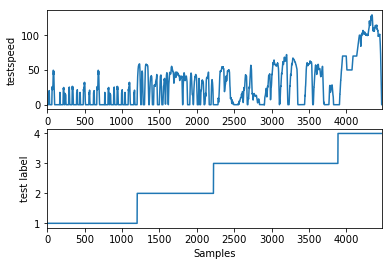

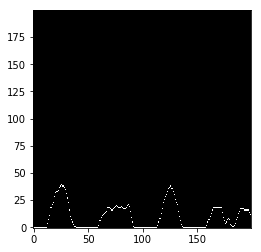

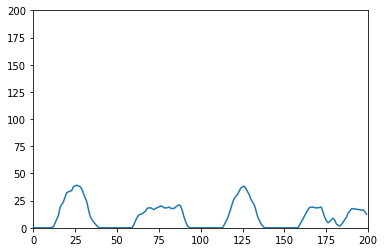

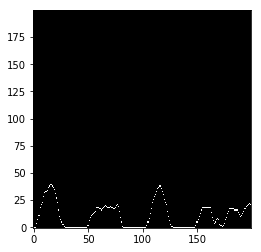

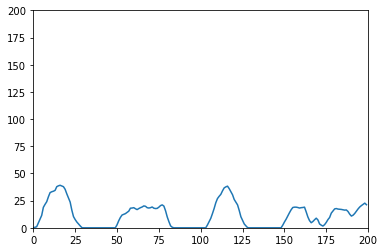

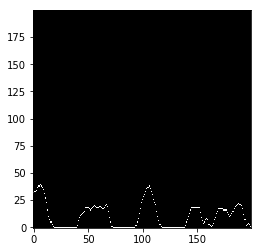

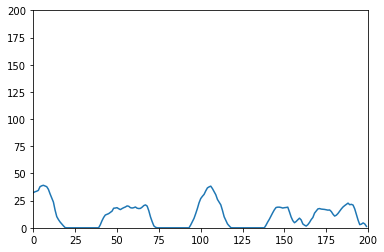

In [146]:
import scipy.io as sio
import matplotlib.pyplot as plt
from PIL import Image

x0=sio.loadmat('../data/transpeed')['transpeed'][0:4612].flatten()
y0=sio.loadmat('../data/trainclass')['trainclass'][0:4612].flatten()
x1=sio.loadmat('../data/testspeed')['cyc_mph1'][0:4479].flatten()
y1=sio.loadmat('../data/testclass')['testcyc'][0:4479].flatten()

input_w=200
step=10
N=3
dataset=np.zeros([N,input_w,input_w])
for i in range(N):
    dataset[i,(x0[i*step:i*step+input_w].astype(int)),range(input_w)]=1


plt.figure(1)
ax1=plt.subplot(211)
plt.plot(range(len(x0)),x0)
plt.xlabel('Samples')
plt.ylabel('trainspeed')
plt.xlim(0,len(x0))
# plt.ylim(0,1)
ax2=plt.subplot(212)
plt.plot(range(len(y0)),y0)
plt.xlabel('Samples')
plt.ylabel('train label')
plt.xlim(0,len(y0))

plt.figure(2)
ax1=plt.subplot(211)
plt.plot(range(len(x1)),x1)
plt.xlabel('Samples')
plt.ylabel('testspeed')
plt.xlim(0,len(x1))
# plt.ylim(0,1)
ax2=plt.subplot(212)
plt.plot(range(len(y1)),y1)
plt.xlabel('Samples')
plt.ylabel('test label')
plt.xlim(0,len(y1))

plt.figure(3)
img = Image.fromarray(dataset[0].astype('uint8')).convert('L')
plt.imshow(img,cmap='gray',origin='lower')
plt.figure(3_1)
plt.plot(x0[:200])
plt.xlim(0,200)
plt.ylim(0,200)

plt.figure(4)
img = Image.fromarray(dataset[1].astype('uint8')).convert('L')
plt.imshow(img,cmap='gray',origin='lower')
plt.figure(4_1)
plt.plot(x0[10:210])
plt.xlim(0,200)
plt.ylim(0,200)

plt.figure(5)
img = Image.fromarray(dataset[2].astype('uint8')).convert('L')
plt.imshow(img,cmap='gray',origin='lower')
plt.figure(5_1)
plt.plot(x0[20:220])
plt.xlim(0,200)
plt.ylim(0,200)

In [206]:
# pool
import numpy as np
a=np.array([[[1,2,3,4,5],[2,3,4,5,6],[4,5,6,7,8],[1,4,5,7,4],[4,2,6,8,0]],[[1,2,3,4,5],[2,3,4,5,6],[4,5,6,7,8],[1,4,5,7,4],[4,2,6,8,0]]])
data_w=5
filter_w=3
stride=2
# padding=5%stride
# a_padding=np.lib.pad(a,pad_width=((padding,padding),(padding,padding)), mode='constant', constant_values=1)
data_width_=int((data_w-filter_w)/stride)+1
a_=np.zeros((2,data_width_,data_width_),dtype='float')

for k in range(2):
    for i in range(data_width_):
        for j in range(data_width_):
            a_[k,i,j]=np.max(a[k,i*stride:i*stride+filter_w,j*stride:j*stride+filter_w])

# for i in range(data_width_):
#     for j in range(data_width_):
#         a_[i,j]=np.max(a[stride*i:stride*i+filter_w,stride*j:stride*j+filter_w])

print(a)
print(a_)

[[[1 2 3 4 5]
  [2 3 4 5 6]
  [4 5 6 7 8]
  [1 4 5 7 4]
  [4 2 6 8 0]]

 [[1 2 3 4 5]
  [2 3 4 5 6]
  [4 5 6 7 8]
  [1 4 5 7 4]
  [4 2 6 8 0]]]
[[[6. 8.]
  [6. 8.]]

 [[6. 8.]
  [6. 8.]]]


In [156]:
dataset=np.zeros([3,2])
data=np.array([2.1,3.9])
for i in range(3):
    dataset[i]=data
print(dataset)
dataset[(0,2),(0,1)]=0
print(dataset)
dataset_=dataset.astype(int)
print(data[0:].astype(int))
print(data.size)

[[2.1 3.9]
 [2.1 3.9]
 [2.1 3.9]]
[[0.  3.9]
 [2.1 3.9]
 [2.1 0. ]]
[2 3]
2


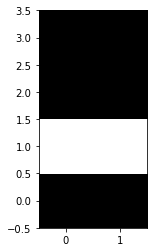

In [155]:
from PIL import Image
# img=np.array([[0,0,0,0],[255,255,255,255],[0,0,0,0],[255,255,255,255]])
img=np.array([[0,0],[100,100],[0,0],[0,0]])
img = Image.fromarray(img.astype('uint8')).convert('L')
plt.imshow(img,cmap='gray',origin='lower')
plt.show()

In [160]:
trainspeed=sio.loadmat('../data/transpeed')['transpeed'].flatten()
print(trainspeed.shape)

(4612,)


In [170]:
x=np.array([1,1,1,2,2,2,2,3,3,3,3,])
index=np.argwhere(x==2).flatten()
print(x[index])

[[2]
 [2]
 [2]
 [2]]


In [4]:
import tensorflow as tf
import numpy as np

tf.reset_default_graph()

def Next(array):
    norm=array-np.ones((array.shape[0],array.shape[0])).dot(array)/array.shape[0]
    norm_1=array-np.mean(array,axis=0)
    norm_1[:,-1:]=0
    print(norm)
    print(norm_1)
    norm[:,:-1]=0
    print(norm)
#     u,s,_=np.linalg.svd(norm,full_matrices=False)
#     sigma=np.diag(s)
#     s_2_norm=np.square(s)/np.sum(np.square(s))
#     ladder=np.cumsum(s_2_norm)
#     keep_dimension=next(i for i,value in enumerate(ladder) if value>=0.9)+1
#     pca=u.dot(sigma[:,:keep_dimension])
#     pca_padding=np.pad(pca,((0,0),(0,norm.shape[1]-keep_dimension)),'constant')
    return array
    
    
a=tf.constant([[1.,10.,5,4],[3,2,7,6],[1,2,3,4]],dtype=tf.float32)
index=tf.py_func(Next,[a],tf.float32)

with tf.Session() as sess:
    print(sess.run(a))
    sess.run(index)

[[ 1. 10.  5.  4.]
 [ 3.  2.  7.  6.]
 [ 1.  2.  3.  4.]]
[[-0.66666667  5.33333333  0.         -0.66666667]
 [ 1.33333333 -2.66666667  2.          1.33333333]
 [-0.66666667 -2.66666667 -2.         -0.66666667]]
[[-0.6666666  5.3333335  0.         0.       ]
 [ 1.3333334 -2.6666665  2.         0.       ]
 [-0.6666666 -2.6666665 -2.         0.       ]]
[[ 0.          0.          0.         -0.66666667]
 [ 0.          0.          0.          1.33333333]
 [ 0.          0.          0.         -0.66666667]]


In [132]:
# tf.pad and tf.maximum
import tensorflow as tf

tf.reset_default_graph()
sess=tf.Session()

a=tf.constant([[1,2,3],[4,5,6]])
b=tf.pad(a,[[0,0],[0,2]],constant_values=0)
c=tf.pad(a,[[1,0],[0,0]],constant_values=0)
d=tf.constant(-2)
f=tf.maximum(d,0)
print(sess.run(b))
print(sess.run(f))

[[1 2 3 0 0]
 [4 5 6 0 0]]
0


In [49]:
# # kpca projection by sklearn
# import matplotlib.pyplot as plt
# from sklearn.decomposition import KernelPCA

# # X = np.array([[0, -1.0], [-2, -1], [-3, -2], [11, -15], [20, 10], [3, 2]])
# X=trainset_.reshape([-1,1600])
# transformer = KernelPCA(n_components=4,kernel='rbf')
# X_kpca = transformer.fit_transform(X)
# reds=trainclass==1 
# blues=trainclass==2
# greens=trainclass==3
# yellows=trainclass==4

# # plot results
# plt.figure()
# # plt.subplot(2,2,1,aspect='auto')
# plt.title('combined four types')
# plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",s=20, edgecolor='k')
# plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",s=20, edgecolor='k')
# plt.scatter(X_kpca[greens, 0], X_kpca[greens, 1], c="green",s=20, edgecolor='k')
# plt.scatter(X_kpca[yellows, 0], X_kpca[yellows, 1], c="yellow",s=20, edgecolor='k')
# plt.xlabel("$x_1$")
# plt.ylabel("$x_2$")
# plt.show()

